<a href="https://colab.research.google.com/github/rahiakela/machine-learning-explainability/blob/main/ecco-language-models-explainability/1_ecco_language_models_explainability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Intro to Ecco -- Making Language Models More Transparent
This notebook is an intro to [Ecco](https://www.eccox.io) and is the companion to the video: [Take A Look Inside Language Models With Ecco | PyData Khobar](https://www.youtube.com/watch?v=rHrItfNeuh0). 
 

In [1]:
%%capture
# Install Ecco. This assumes you have pytorch installed.
!pip install ecco

In [ ]:
import ecco

import warnings
warnings.filterwarnings('ignore')

# Load pre-trained language model. Setting 'activations' to True tells Ecco to capture neuron activations.
# distillgpt is a distilled GPT2 model. You can also try 'gpt2' 
lm = ecco.from_pretrained('distilgpt2', activations=True)

## Overview

Complete the sentence:
`It was a matter of ____`

In [17]:
text = " it was a matter of"

# Generate one token
output_1 = lm.generate(text, generate=1, do_sample=False)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [4]:
text = " it was a matter of"

# Generate one token
output_2 = lm.generate(text, generate=2, do_sample=False)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [5]:
text = " it was a matter of"

# Generate one token
output_2 = lm.generate(text, generate=3, do_sample=False)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [12]:
text = " it was a matter of"

# Generate one token
output_2 = lm.generate(text, generate=50, do_sample=False)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [13]:
# Show the top 10 candidate output tokens for position #5. 
# Layer 5 is the last layer in the model.
output_1.layer_predictions(position=5, layer=5, topk=10)

<IPython.core.display.Javascript object>

This view shows the top 10 candidate tokens, their probability, and their rankings.

In [14]:
output_1.layer_predictions(position=5, layer=5, topk=15)

<IPython.core.display.Javascript object>

### Comparing two token candidates for a single position

In [15]:
# What are the token IDs of the two words?
lm.tokenizer(" principle principal")

{'input_ids': [7989, 10033], 'attention_mask': [1, 1]}

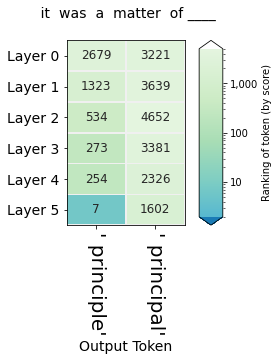

In [18]:
# Compare the rankings of "Principle" and "Principal" across layers
output_1.rankings_watch(watch=[7989, 10033], position=5)

## Exploring World Knowledge And Layer Analysis
Does the model "know" where Heathrow airport is located? To probe the model, we let's try the input sentence: 

`Heathrow airport is located in ____`

In [19]:
text = " Heathrow airport is located in"
output_2 = lm.generate(text, generate=5, do_sample=False)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

While the output is not incorrect, it doesn't really answer the question we are after. 

Let's slightly change the input sentence:

In [20]:
text = " Heathrow airport is located in the city of"
output_2 = lm.generate(text, generate=1, do_sample=False)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [21]:
# What other tokens were possible to output in place of "London"?
output_2.layer_predictions(position=9, layer=5, topk=30)

<IPython.core.display.Javascript object>

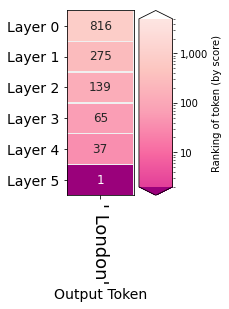

In [22]:
# Now that the model has selected the tokens "London . \n"
# How did each layer rank these tokens during processing?
output_2.rankings()

This visualization is based on the great visual treatment by nostalgebraist in [Interpreting GPT: the logit lens](https://www.lesswrong.com/posts/AcKRB8wDpdaN6v6ru/interpreting-gpt-the-logit-lens).

### Probing the model's world knowledge 

What happens if we present the following input sentence to the model:

`The countries of the European Union are:\n1. Austria\n2. Belgium\n3. Bulgaria\n4. ___________`

Namely, we have these questions:
* Q. Will the model continue the numbering correctly?
* Q. Will it succeed in following the formatting?
* Q. Will it succeed in naming countries? European ones?
* Q. Will the model "notice" the alphabetical order of the list? Will it follow it?


In [23]:
text= "The countries of the European Union are:\n1. Austria\n2. Belgium\n3. Bulgaria\n4."

output_3 = lm.generate(text, generate=20, do_sample=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The `rankings()` visualization view shows us at which layers the model resolved the output token for each position.

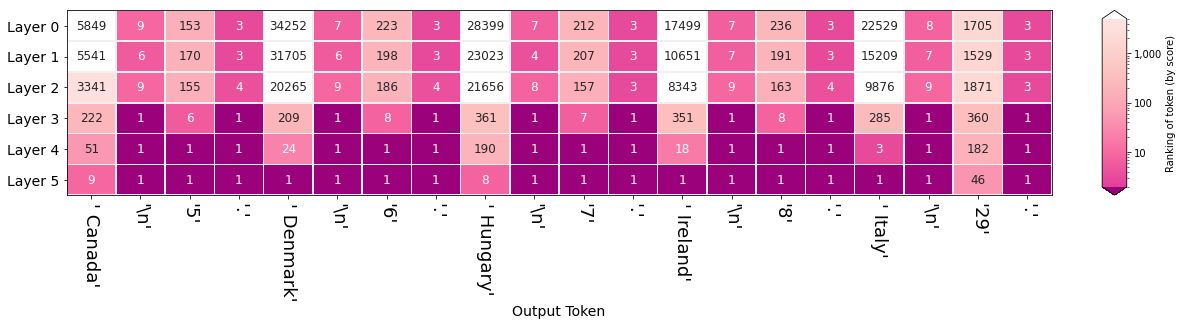

In [24]:
output_3.rankings()

The `saliency()` visualization shows which tokens contributed the most towards generating each output token (using the gradient X Input method):

In [25]:
output_3.saliency()

<IPython.core.display.Javascript object>

### Detailed saliency view

We can see a more detailed view of the saliency values using the detailed view:

In [26]:
output_3.saliency(style="detailed")

<IPython.core.display.Javascript object>